# Resources in Google Drive
- [Datasets](https://drive.google.com/drive/folders/11fiymuhN4pjoEZm8Uo3UC66-ej3gcaA8?usp=sharing)
- [Reddit Dataset](https://drive.google.com/drive/folders/1b9TBGXwKMhA0l7avuhfZJh_KyI1he3GV?usp=sharing)
- [Best Checkpoint](https://drive.google.com/drive/folders/15bNYGAeJYttUbOwoJTOe9iH92hb7X8jg?usp=sharing)
- [csv data](https://drive.google.com/file/d/1XA4pUmyZ7XMs7tTcGI83ZnVFI4GgWuxM/view?usp=sharing)

# Preprocessing

## Load Data

In [2]:
import os
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


Data Dir in my Drive
- /content/gdrive/MyDrive/Data/Mixed_Depression
- /content/gdrive/MyDrive/Data/Reddit_Depression_

In [3]:
!ls /content/gdrive/MyDrive/Data/Reddit_Depression_
!ls /content/gdrive/MyDrive/Data/Mixed_Depression

 depression	  non_depression	    non_depression.zip
 depression.zip  'non_depression (1).zip'
depression  non_depression


In [4]:
# specify the location of the dataset in the drive
data_dir = '/content/gdrive/MyDrive/Data/Mixed_Depression'
reddit_dir = '/content/gdrive/MyDrive/Data/Reddit_Depression_'

depression_dir = os.path.join(data_dir, 'depression')
nondepression_dir = os.path.join(data_dir, 'non_depression')

reddit_depression_dir = os.path.join(reddit_dir, 'depression')
reddit_nondepression_dir = os.path.join(reddit_dir, 'non_depression')

## Read and clean sentences from text directory

In [5]:
import re
import numpy as np
from google.colab import files

In [6]:
depression_files = os.listdir(depression_dir)
print("Examples of some depression file names")
list(depression_files)[:11]

Examples of some depression file names


['brokenheartedangel_e_2_a_xx.txt',
 'anxietystruggles.txt',
 'helpmeplease1987_e_2_a_c3f_xx.txt',
 'mumzysuz_e_2_b_c1_xx.txt',
 'vaginabeater.txt',
 'EthanTreadzy.txt',
 'annika_e_2_b_1_xx.txt',
 'fallingsun_e_1_a_1_nl.txt',
 'andysimberg.txt',
 'gabegee.txt',
 'WeAreAllDyingSlowly.txt']

In [7]:
file_no = 17
with open(os.path.join(depression_dir, depression_files[file_no]), 'r') as f:
  example_sentence= ' '.join(f.readlines())

print(f"Example file {file_no}:\n\n")
print(example_sentence)

Example file 17:


i miss my old self
 i remember how easy life was when i was a youth. clubbing, would hang out with mates, went to the gym, had myself a beautiful bird, played football for my school, and made my parents proud. today? im a pathetic sack of shit who does nothing but study for uni all day and I've lost so many mates cause of it. although now that I think abt it, i don't just study all day. in addition, I've also wasted/am wasting two years of my life on this fucking website winding up people on alts on the football forums here and I fucking regret every last second of it.


In [8]:
# Simple Data Processing
def process_data(sentences):
  sentences = sentences.lower().replace('\n',' ')
  sentences = re.sub(r'[^0-9a-zA-Z\'\s]', ' ', sentences)
  sentences = ' '.join(sentences.split()[:200])
  return sentences

print(f"Example file {file_no} after processing\n\n")
process_data(example_sentence)

Example file 17 after processing




"i miss my old self i remember how easy life was when i was a youth clubbing would hang out with mates went to the gym had myself a beautiful bird played football for my school and made my parents proud today im a pathetic sack of shit who does nothing but study for uni all day and i've lost so many mates cause of it although now that i think abt it i don't just study all day in addition i've also wasted am wasting two years of my life on this fucking website winding up people on alts on the football forums here and i fucking regret every last second of it"

In [9]:
# method to read files from given directory
def read_files(files_dir):
  files = os.listdir(files_dir)
  return_sentences = []
  for file in files:
    with open(os.path.join(files_dir, file), 'r', encoding = "ISO-8859-1") as f:
      sentence = process_data('\n'.join(f.readlines()))
      # sentence = [s in sentence if len(s) > 9]
      return_sentences.append(sentence)

  return return_sentences


In [10]:
depression_posts = read_files(depression_dir)
nondepression_posts = read_files(nondepression_dir)
print(f"Number of depression posts: {len(depression_posts)}")
print(f"Number of nondepression posts: {len(nondepression_posts)}")

Number of depression posts: 1307
Number of nondepression posts: 1474


In [11]:
reddit_depression_posts = read_files(reddit_depression_dir)
reddit_nondepression_posts = read_files(reddit_nondepression_dir)
print(f"Number of reddit depression posts: {len(reddit_depression_posts)}")
print(f"Number of reddit nondepression posts: {len(reddit_nondepression_posts)}")

Number of reddit depression posts: 748
Number of reddit nondepression posts: 682


In [12]:
depression_dataset = depression_posts + reddit_depression_posts
nondepression_dataset = nondepression_posts + reddit_nondepression_posts
print(f"Number of reddit depression posts in the dataset: {len(depression_dataset)}")
print(f"Number of reddiy nondepression posts in the dataset: {len(nondepression_dataset)}")

Number of reddit depression posts in the dataset: 2055
Number of reddiy nondepression posts in the dataset: 2156


In [13]:
def to_csvfile(depression_data, nondepression_data, download=False):
  depression_np = np.stack((depression_data, [1] * len(depression_data)), axis=1)
  nondepression_np = np.stack((nondepression_data, [0] * len(nondepression_data)), axis=1)
  data_set = np.concatenate([depression_np, nondepression_np], axis=0)
  np.random.seed(11)
  np.random.shuffle(data_set)
  # return data_set
  np.savetxt("depression_dataset.csv", 
             data_set, 
             delimiter=",", 
             fmt = '%s',
             header='post,is_depression',
             comments="")
  if download:
    files.download("depression_dataset.csv")

In [14]:
to_csvfile(depression_dataset, nondepression_dataset, download=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Load Data from CSV
**Please run this module before test and manipulate the model**

In [15]:
import pandas as pd
import os
from google.colab import files

In [16]:
data_path = "depression_dataset.csv"
if data_path not in os.listdir('./'):
  print("The csv file is not in the colab runtime, please upload it manually!")
  files.upload()

else:
  print("The csv file is in the colab runtime, please continue!")

The csv file is in the colab runtime, please continue!


In [17]:
df = pd.read_csv(data_path)

In [18]:
df.head(10)

,post,is_depression
0,this is where you'll find most anything about ...,0
1,i'm falling head over heels for you i'm not as...,0
2,im wasting my life as a 15 year old currently ...,1
3,wow time went by fast tomorrow is my birthday ...,0
4,on sat nite my grandma complained that her tum...,0
5,potential locations for s v dlc i've seen a fe...,0
6,well right now i am about to eat yum so i will...,0
7,oh my gosh how gay am i when i got my ears pie...,0
8,despair is the normal state of my life i haven...,1
9,having friends of the opposite sex whilst in a...,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4211 entries, 0 to 4210
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   post           4211 non-null   object
 1   is_depression  4211 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 65.9+ KB


In [20]:
df['is_depression'].value_counts()

0    2156
1    2055
Name: is_depression, dtype: int64

# Visualization

## Dataset

In [21]:
depression_posts = df[df['is_depression']==1]['post']
depression_posts

2       im wasting my life as a 15 year old currently ...
8       despair is the normal state of my life i haven...
10      one little thing creates a ripple i will be do...
11      how do you guys make friends in a new city mov...
12      i am so depressed i don't know what to do drop...
                              ...                        
4203    well i bought the tens machine got it set up e...
4205    anyone ever wish they were good at something s...
4206    if you care will you read my depression has go...
4207    waking up i have nightmares every single night...
4210    i don t know what to do worth a shot hey every...
Name: post, Length: 2055, dtype: object

In [22]:
nondepression_posts = df[df['is_depression']==0]['post']
nondepression_posts

0       this is where you'll find most anything about ...
1       i'm falling head over heels for you i'm not as...
3       wow time went by fast tomorrow is my birthday ...
4       on sat nite my grandma complained that her tum...
5       potential locations for s v dlc i've seen a fe...
                              ...                        
4201    well if anybody read my xanga then you would k...
4202    skincare for preventing breakouts when wearing...
4204    d categorical sequence prediction for maximum ...
4208    trouble with adult daughter my daughter is 20 ...
4209    good cookware set under 1 000 iron skillet any...
Name: post, Length: 2156, dtype: object

## N-gram

In [23]:
import unicodedata
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
def basic_clean(text):
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english')
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


In [24]:
depression_words = basic_clean(''.join(str(depression_posts.tolist())))
nondepression_words = basic_clean(''.join(str(nondepression_posts.tolist())))

In [25]:
bigrams_series_depression = (pd.Series(nltk.ngrams(depression_words, 2)).value_counts())[:30]
bigrams_series_depression

(feel, like)        773
(dont, know)        349
(dont, want)        231
(year, old)         189
(like, im)          138
(anyone, else)      112
(year, ago)         104
(even, though)       92
(every, day)         89
(make, feel)         88
(get, better)        88
(dont, even)         87
(im, tired)          82
(high, school)       73
(dont, feel)         73
(im, going)          72
(im, sure)           71
(best, friend)       71
(2, year)            68
(think, im)          67
(felt, like)         64
(dont, think)        61
(first, time)        60
(want, die)          59
(know, im)           59
(wish, could)        58
(mental, health)     57
(im, really)         57
(month, ago)         57
(even, know)         56
dtype: int64

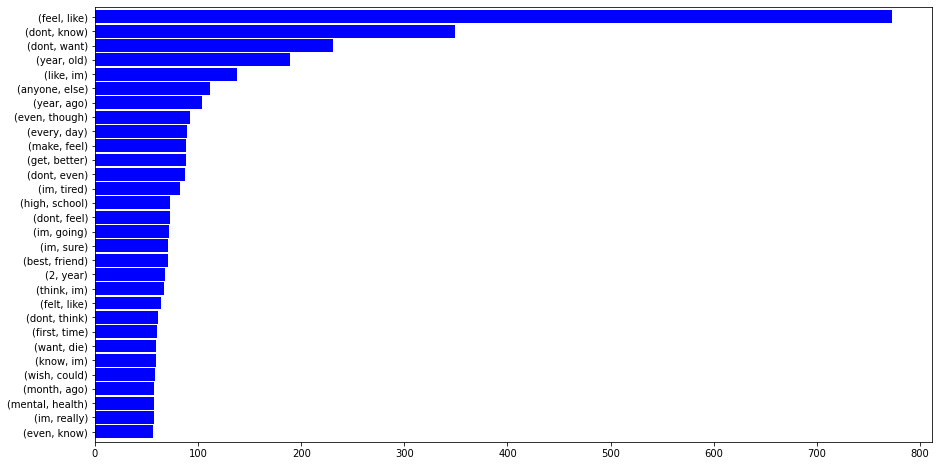

In [26]:
bigrams_series_depression.sort_values().plot.barh(color='blue', width=.9, figsize=(15, 8))

In [27]:
bigrams_series_nondepression = (pd.Series(nltk.ngrams(nondepression_words, 2)).value_counts())[:30]
bigrams_series_nondepression

(dont, know)       207
(best, friend)     192
(feel, like)       172
(year, old)        119
(dont, want)        94
(im, going)         84
(year, ago)         82
(first, time)       75
(high, school)      74
(im, sure)          73
(last, night)       55
(even, though)      52
(pok, mon)          52
(month, ago)        47
(oh, well)          47
(dont, think)       46
(make, feel)        43
(one, day)          43
(two, week)         43
(long, time)        41
(good, friend)      40
(dont, like)        40
(last, year)        39
(look, like)        39
(really, want)      38
(im, gonna)         37
(seems, like)       36
(close, friend)     35
(every, time)       35
(would, like)       35
dtype: int64

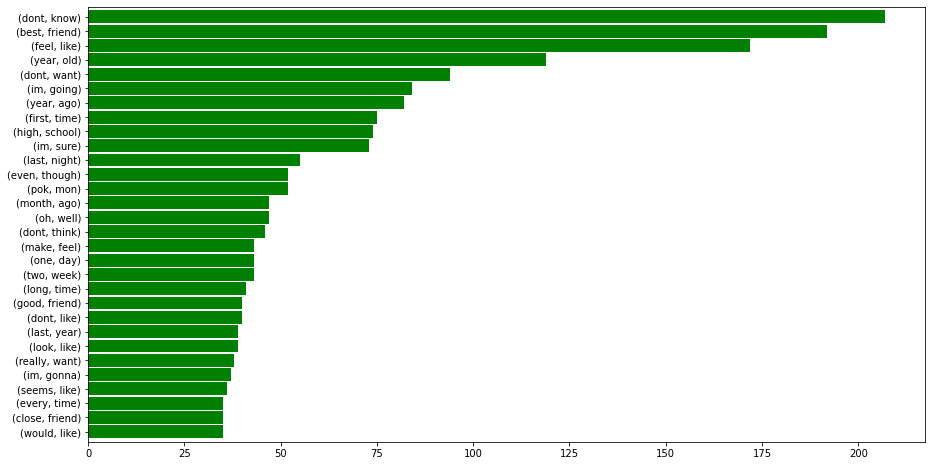

In [28]:
bigrams_series_nondepression.sort_values().plot.barh(color='green', width=.9, figsize=(15, 8))

## Word Cloud

In [29]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [30]:
def generate_word_cloud(text):
    wordcloud = WordCloud(
        width = 600,
        height = 300,
        background_color = 'black').generate(str(text))
    fig = plt.figure(
        figsize = (20, 15),
        facecolor = 'k',
        edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

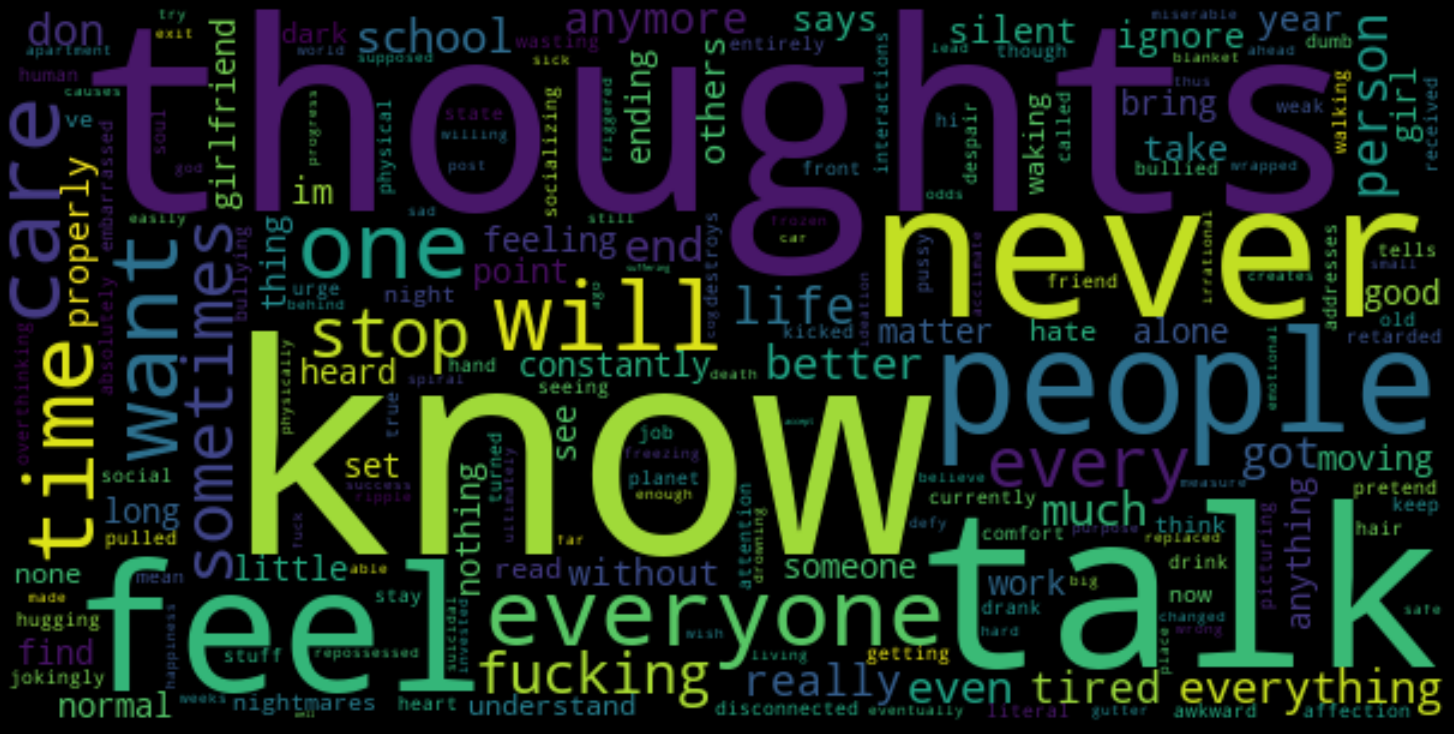

In [31]:
depression_text = depression_posts.values
generate_word_cloud(depression_text)

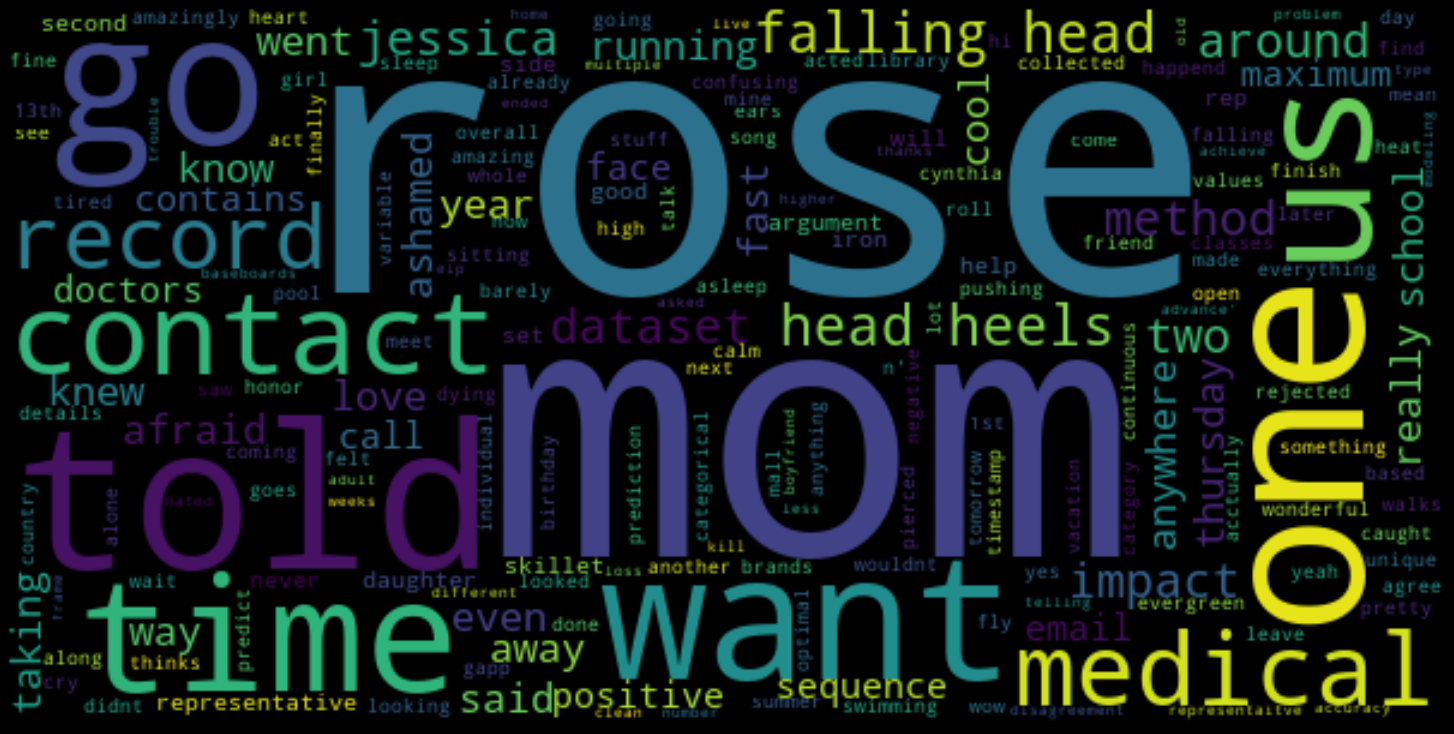

In [32]:
nondepression_text = nondepression_posts.values
generate_word_cloud(nondepression_text)

# Base Model (TF-IDF)

## Model

In [33]:
# import packages
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,plot_confusion_matrix

In [34]:
x_train,x_test,y_train,y_test = train_test_split(df['post'], df['is_depression'], test_size=0.3, random_state=11)

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 87.03%


## Visualize Result

In [35]:
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[580  70]
 [ 94 520]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       650
           1       0.88      0.85      0.86       614

    accuracy                           0.87      1264
   macro avg       0.87      0.87      0.87      1264
weighted avg       0.87      0.87      0.87      1264



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


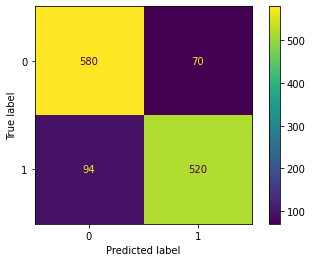

In [36]:
plot_confusion_matrix(model,x_test,y_test)

## Predict

In [37]:
example = "No More Games. No More Bombs. No More Walking. No More Fun.\
 No More Swimming. 67. That is 17 years past 50. 17 more than I needed or wanted. \
 Boring. I am always bitchy. No Fun for anybody. 67. You are getting Greedy. \
 Act your old age. Relax This won't hurt."

In [38]:
model.predict([example])


array([0])

# BERT Model

## Load pre-trained bert models
- https://www.sbert.net/docs/pretrained_models.html

In [39]:
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79 kB 7.2 MB/s 
     |████████████████████████████████| 4.2 MB 60.7 MB/s 
     |████████████████████████████████| 1.2 MB 33.9 MB/s 
     |████████████████████████████████| 86 kB 6.3 MB/s 
     |████████████████████████████████| 6.6 MB 48.2 MB/s 
     |████████████████████████████████| 596 kB 55.7 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=767f21f5c5f6983460303641a4c313284a01e3e983731136124a63f69eca3e5b
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [40]:
bert_model = SentenceTransformer('all-mpnet-base-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [41]:
posts = df.post
labels = df.is_depression

In [42]:
embeddings = bert_model.encode(posts, show_progress_bar=True)
print(f"Shape of input: {embeddings.shape}")

Batches:   0%|          | 0/132 [00:00<?, ?it/s]

Shape of input: (4211, 768)


In [43]:
example_post = 17
print(f"Post: {posts[example_post]}")
# Post: everyday i feel like i could cry from how stressed out i have been about 
# having work my entire life but yet at the same time i feel stressed and sad i 
# feel numb like i am unable to express any kind of emotion whatsoever i have 
# also been moody and i get easily pissed off at things i have felt this emotional 
# numbness and irritability ever since i was as young as 6 years old not to self 
# diagnose but i am fairly certain i grew up with depression


print(f"Label: {labels[example_post]}")
# Label: 1

Post: everyday i feel like i could cry from how stressed out i have been about having work my entire life but yet at the same time i feel stressed and sad i feel numb like i am unable to express any kind of emotion whatsoever i have also been moody and i get easily pissed off at things i have felt this emotional numbness and irritability ever since i was as young as 6 years old not to self diagnose but i am fairly certain i grew up with depression
Label: 1


In [44]:
print(f"Feature dimension of example post: {embeddings[example_post].shape}\n\n")
print(f"First 40 features of example post: \n{embeddings[example_post][:40]}")

# Feature dimension of example post: (768,)


# First 40 features of example post: 
# [ 1.63863488e-02 -2.75948439e-02 -1.82240701e-03 -1.98704749e-03
#   5.84999435e-02  7.89095927e-03  1.76255703e-02  3.55180837e-02
#   2.25055926e-02 -1.58103183e-02  4.40846272e-02  6.94564208e-02
#  -4.42554504e-02 -1.39227798e-02  6.05904572e-02 -4.76415940e-02
#  -2.78981794e-02  2.03064065e-02  5.76219223e-02  3.11367400e-02
#   5.93534345e-03 -5.02808020e-03  1.40536465e-02  2.27633137e-02
#  -3.78988148e-03  1.83282569e-02  3.81958894e-02 -2.31885798e-02
#   2.67440658e-02  8.93348269e-03  8.53378233e-03  1.03717716e-02
#   1.58862192e-02 -7.64072463e-02  1.61995297e-06 -2.48617176e-02
#  -1.48610827e-02 -3.55770774e-02  5.82643040e-02 -1.49084609e-02]

Feature dimension of example post: (768,)


First 40 features of example post: 
[ 1.63863488e-02 -2.75948439e-02 -1.82240701e-03 -1.98704749e-03
  5.84999435e-02  7.89095927e-03  1.76255703e-02  3.55180837e-02
  2.25055926e-02 -1.58103183e-02  4.40846272e-02  6.94564208e-02
 -4.42554504e-02 -1.39227798e-02  6.05904572e-02 -4.76415940e-02
 -2.78981794e-02  2.03064065e-02  5.76219223e-02  3.11367400e-02
  5.93534345e-03 -5.02808020e-03  1.40536465e-02  2.27633137e-02
 -3.78988148e-03  1.83282569e-02  3.81958894e-02 -2.31885798e-02
  2.67440658e-02  8.93348269e-03  8.53378233e-03  1.03717716e-02
  1.58862192e-02 -7.64072463e-02  1.61995297e-06 -2.48617176e-02
 -1.48610827e-02 -3.55770774e-02  5.82643040e-02 -1.49084609e-02]


## Split data into training, validation, and test sets

In [45]:
X_train, X_test, y_train, y_test = train_test_split(embeddings, labels, 
                                          test_size=0.3, random_state=111)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, 
                                          test_size=0.5, random_state=111)
print ("Training set shapes:", X_train.shape, y_train.shape)
print ("Valid set shapes:", X_valid.shape, y_valid.shape)
print ("Test set shapes:", X_test.shape, y_test.shape)

Training set shapes: (2947, 768) (2947,)
Valid set shapes: (632, 768) (632,)
Test set shapes: (632, 768) (632,)


## Build Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot

In [ ]:
c1 = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)
c2 = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
checkpoint_path = './checkpoint'
c3 = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',
    save_best_only=True,
)

In [ ]:
def create_model():
  model = Sequential([
    layers.Dropout(0.5, 
                   name='dropout'),
    layers.Dense(1024, 
                 activation='relu', 
                 input_shape=(768,), 
                 name='fc'),
    layers.Dropout(0.5, 
                   name='dropout2'),
    layers.Dense(1, 
                 activation='sigmoid', 
                 name='output')
  ]
  )
  return model
model = create_model()

opt = tf.keras.optimizers.Adam(learning_rate=2e-4, )

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
hist = model.fit (X_train, y_train, epochs=50, batch_size=64 , callbacks=[c1, c2, c3],
                      validation_data=(X_valid, y_valid))

In [ ]:
# get confusion matrix and classification report
res = model.evaluate(X_test, y_test)
y_pred = (model.predict(X_test)>0.5).astype(int)

In [ ]:
model = create_model()
checkpoint_path = './checkpoint'
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model.load_weights(checkpoint_path)
y_pred = (model.predict(X_test)>0.5).astype(int)
res = model.evaluate(X_test, y_test)
print(f"\nLoss: {res[0]}\nAccuracy: {res[1]}")
print(f"\nConfusion Matrix:\n\n{confusion_matrix(y_pred, y_test)}\n")
print(f"Classification Report:\n\n{classification_report(y_pred, y_test)}")

In [ ]:
# plot train/valid loss and accuracy
pyplot.figure(figsize=(15,5))
pyplot.subplot(1, 2, 1)
pyplot.plot(hist.history['loss'], 'r', label='Training loss')
pyplot.plot(hist.history['val_loss'], 'g', label='Validation loss')
pyplot.legend()
pyplot.subplot(1, 2, 2)
pyplot.plot(hist.history['accuracy'], 'r', label='Training accuracy')
pyplot.plot(hist.history['val_accuracy'], 'g', label='Validation accuracy')
pyplot.legend()
pyplot.show()

plot_model(model)